In [4]:
import importlib# , sbmtm_developer# sbmtm
#import graph_tool.all as gt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import pickle
sys.path.insert(1,'C:/Users/Elisa/Documents/ELISA/MAGISTRALE/Tesi/master_thesis-master/')
sys.path.insert(1,'C:/Users/Elisa/Documents/ELISA/MAGISTRALE/Tesi/Myra_dataset/')
#from hsbmpy import clusteranalysis
import math

In [8]:
directory = "Myra_dataset/RPMnorm_avgALignedReplicates/"

#df = pd.read_csv("%sNew_LML_averaged_fitted_truncated.csv" %(directory), index_col = [0])
df = pd.read_csv("%sNew_Olfr_LML_hvg_fitted_truncated_x100.csv" %(directory), index_col = [0])


#df_DEGS = pd.read_csv("DEGsIntersect3D_dataset.csv", index_col = [0])
#df_DEGS.head()
  

In [53]:

def truncate_negative(x):
    if x < 0:
        x = 0
    return x 
df = df.applymap(truncate_negative)

#df.to_csv("%snew_LML_averaged_fitted_truncated.csv" %(directory))
np.where(df.to_numpy() < 0)

(array([], dtype=int64), array([], dtype=int64))

In [9]:
#np.where(df.to_numpy() < 0)
df_scialdone = df.T

In [7]:
# logarithmic table 
for gene in df_scialdone.columns:
    for i in range(len(df_scialdone.index)):
       # print(df_scialdone[gene][i])
        df_scialdone[gene][i] = math.log10(df_scialdone[gene][i] + 1)
    
df_scialdone

KeyboardInterrupt: 

In [56]:
df_scialdone.to_csv("%sAP_aligned_log10.csv" %(directory))

In [133]:
#now I filter lowly abundant genes
df_scialdone = df.T
highly_expr = []

for item in df_scialdone.columns:
    min_group = np.argsort(df_scialdone[item].values)[:3]
    max_group = np.argsort(df_scialdone[item].values)[-3::]
    min_av = np.mean(df_scialdone[item].values[min_group])
    max_av = np.mean(df_scialdone[item].values[max_group])
    #print(max_group)
    if min_av < 1:
        if (max_av - min_av) >= 4:
            highly_expr.append(item)
    else:
        if (max_av/min_av) >=2:
            highly_expr.append(item)
            
            
len(highly_expr)   
df_scialdone = df_scialdone.loc[:,highly_expr]

In [16]:
df_scialdone = df_scialdone.loc[~(df_scialdone==0).all(axis=1)]
df_scialdone.head()

,Wfdc18,Nqo1,Gstm5,Pde1c,2310003L06Rik,Ptgds,Id4,Cartpt,Dnah5,Apod,...,Tmem38a,Rpl21,Foxa1,Gm11808,Dnaja1,Lcn4,Scgb1b27,Apoe,S100a1,Olfr170
1-37,0.0,5.960633,6.729394,4.608253,0.0,5.783529,4.976518,4.520236,2.354899,5.945424,...,4.958774,5.810194,2.008865,2.701988,5.541807,0.0,0.0,7.345797,6.999620,1.471772
1-38,0.0,5.952719,6.711367,4.600205,0.0,5.338652,4.946718,4.507853,2.402116,5.920335,...,4.950116,5.806940,2.047086,2.668931,5.535756,0.0,0.0,7.290708,6.993623,1.454347
1-39,0.0,5.948824,6.696586,4.591166,0.0,4.644100,4.914899,4.497461,2.447016,5.896451,...,4.947283,5.803537,2.082353,2.635514,5.529189,0.0,0.0,7.236730,6.987081,1.435586
1-40,0.0,5.949559,6.685708,4.581033,0.0,2.560909,4.881153,4.489407,2.489637,5.874110,...,4.951007,5.799946,2.114654,2.602044,5.522042,0.0,0.0,7.184652,6.980040,1.415432
1-41,0.0,5.955473,6.679375,4.569693,0.0,0.000000,4.845585,4.484034,2.530022,5.853671,...,4.961884,5.796126,2.143970,2.568871,5.514254,0.0,0.0,7.135392,6.972550,1.393822


In [57]:
count = 0
ORs = []
pos = []

#for item in svg_names:
for item in df_scialdone.columns:
    
    if (item.find('Olfr') != -1):# == 'H*':
        pos.append(count)
        ORs.append(item)
    count += 1 
    


In [58]:
df_scialdone = df_scialdone.iloc[:,pos]
df_scialdone.head()

,Olfr1,Olfr10,Olfr1000,Olfr1006,Olfr1009,Olfr101,Olfr1012,Olfr1013,Olfr1014,Olfr1015,...,Olfr983,Olfr984,Olfr985,Olfr986,Olfr987,Olfr988,Olfr99,Olfr992,Olfr994,Olfr995
1,1.453420,0.000000,0.976617,0.310409,0.569485,0.410263,0.000000,0.000000,0.000000,0.903075,...,0.389937,0.335293,0.256590,0.704443,0.835949,0.855692,0.246044,0.000000,1.067675,0.404516
2,1.516542,1.012988,0.000000,0.000000,0.000000,0.000000,0.467233,0.335383,0.000000,0.692586,...,0.000000,0.000000,0.000000,0.000000,0.489863,0.517330,0.818089,0.425141,0.278371,0.345398
3,1.872222,0.661518,0.000000,0.000000,0.451604,0.000000,0.000000,0.325594,0.469890,0.903794,...,0.000000,0.577315,0.521111,0.000000,1.313703,0.687273,1.032383,0.000000,1.301586,0.000000
4,1.170550,0.000000,0.290448,0.357775,0.746325,0.479367,0.777568,1.001101,1.032972,0.904554,...,0.596147,0.156227,0.476075,0.000000,0.927194,0.000000,0.000000,0.949883,0.724651,0.000000
5,1.309956,0.506462,0.000000,0.239957,0.466805,0.465308,0.171436,1.042626,0.289833,0.637338,...,0.274179,0.944304,0.224340,0.000000,0.590501,0.246764,0.923676,0.151113,0.459390,0.731059


In [136]:
df_scialdone.to_csv("%sNew_Olfr_LML_highlyexpr_fitted_truncated.csv"%(directory))

In [10]:
binar = np.empty([len(df_scialdone.index),len(df_scialdone.columns)])
h = 0
for i in df_scialdone.columns:
    X = df_scialdone.loc[:,i]
    median = np.median(X)
    for j in range(len(df_scialdone.index)):
        if X[j] >= median:
            binar[j,h] = 1
        else:
            binar[j,h] = 0
    h += 1
    
binar

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [11]:
df_binarized = pd.DataFrame(binar, index = df_scialdone.index, columns = df_scialdone.columns)
df_binarized.head()

,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610040B10Rik,0610040J01Rik,1010001B22Rik,...,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd5,mt-Nd6,mt-Rnr1,mt-Rnr2,n-R5s82
V1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
V2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
V3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import statsmodels 
from statsmodels.stats import diagnostic as sm
from statsmodels.graphics import tsaplots


Q = 0.05
svg_names = []
Q_values = []
for i in range(len(df_binarized.columns)):
    X = df_binarized.iloc[:,i]
    lbvalue , pvalue = sm.acorr_ljungbox(X, lags = (len(df_binarized.index) - 10))
    if (np.mean(pvalue) < Q):
        Q_values.append(np.mean(pvalue))
        svg_names.append(df_binarized.columns[i])
        
        
svg_names

['0610009B22Rik',
 '0610009E02Rik',
 '0610009L18Rik',
 '0610010F05Rik',
 '0610010K14Rik',
 '0610012G03Rik',
 '0610030E20Rik',
 '0610040B10Rik',
 '0610040J01Rik',
 '1010001B22Rik',
 '1010001N08Rik',
 '1110002L01Rik',
 '1110004F10Rik',
 '1110006O24Rik',
 '1110008P14Rik',
 '1110012L19Rik',
 '1110013H19Rik',
 '1110017D15Rik',
 '1110018N20Rik',
 '1110019D14Rik',
 '1110020A21Rik',
 '1110032A03Rik',
 '1110032F04Rik',
 '1110035H17Rik',
 '1110038B12Rik',
 '1110038F14Rik',
 '1110046J04Rik',
 '1110051M20Rik',
 '1110059E24Rik',
 '1110059G10Rik',
 '1110065P20Rik',
 '1190005I06Rik',
 '1190007I07Rik',
 '1300002E11Rik',
 '1300014J16Rik',
 '1300017J02Rik',
 '1500002C15Rik',
 '1500002F19Rik',
 '1500004A13Rik',
 '1500009L16Rik',
 '1500011B03Rik',
 '1500015A07Rik',
 '1500015L24Rik',
 '1500026H17Rik',
 '1600002K03Rik',
 '1600010M07Rik',
 '1600012H06Rik',
 '1600014C10Rik',
 '1600020E01Rik',
 '1600023N17Rik',
 '1700001C02Rik',
 '1700001G11Rik',
 '1700001G17Rik',
 '1700001K19Rik',
 '1700001K23Rik',
 '1700001L

In [13]:
len(svg_names)

18621

In [127]:
top_500 = np.argsort(Q_values)[1000::-1]
top500_names = np.array(svg_names)[list(top_500)]
np.array(Q_values)[list(top_500)]


array([7.25024433e-08, 7.25024264e-08, 7.25015919e-08, ...,
       2.96940313e-13, 2.96940299e-13, 6.73846401e-15])

In [128]:
df_scialdone = df_scialdone.loc[:,top500_names]
#df_scialdone.to_csv("newDV_Olfr_matrix_fitted_values_01_05.csv")
df_scialdone.head()

,Cyfip2,Rufy2,Rab10,Gprasp2,Olfr1350,Nsmf,Lepr,Cnga4,Uckl1os,Ivns1abp,...,5430402E10Rik,Olfr1281,Olfr1192-ps1,Olfr726,Olfr1280,Olfr1183,Cyp2g1,Sult6b1,Atp1b2,Scd1
1,93.658871,17.823593,112.456295,6.628394,0.000000,79.911568,3.179093,86.762007,23.657298,229.494631,...,22239.197968,49.463337,81.222400,215.537000,94.998406,27.875804,2260.919445,2.755710,10.664295,175.950806
2,71.153743,15.302916,88.077562,1.227589,2.514944,66.673789,1.192319,62.161111,19.854074,183.867445,...,26539.227912,73.258143,65.064666,314.665119,129.267229,19.723184,2235.716678,1.462326,3.971020,46.194353
3,62.421087,12.907080,90.038662,3.347114,0.000000,86.092465,1.028585,85.134494,19.652518,211.466190,...,22325.331191,40.642541,73.515736,191.159360,79.884841,35.218607,2012.765427,1.849044,5.886215,55.527296
4,92.642520,30.356396,124.143944,1.648163,0.618723,131.979687,2.037365,215.418919,41.778494,341.654767,...,15491.518925,87.765382,112.015618,377.794811,117.014651,25.215717,2604.637933,2.433538,7.849124,82.566796
5,60.016123,26.521897,105.469857,4.838054,3.601142,77.076435,2.456981,195.782016,37.428122,294.048295,...,19617.036499,84.371521,124.157063,326.516702,99.057671,22.163126,2716.354275,3.952744,3.790116,65.194869


In [63]:
marker_ors = open("markers.txt").read().splitlines()
len(marker_ors)
l = ["Acsm4","Nqo1","Ncam2"]
markers = list(ORs)  +l
#np.where(df_scialdone.columns == markers)

#df_scialdone["Acsm4"]
markers = np.unique(markers)
#markers = np.array(marker_ors)[np.isin(marker_ors, df_scialdone.columns)]
df_scialdone = df_scialdone[svg_names] #markers
df_scialdone.head()

#df_scialdone.to_csv("new_AP_markers.csv")

,Olfr10,Olfr1000,Olfr1006,Olfr101,Olfr1012,Olfr1013,Olfr1014,Olfr1015,Olfr1019,Olfr102,...,Olfr970,Olfr972,Olfr974,Olfr982,Olfr983,Olfr986,Olfr987,Olfr988,Olfr99,Olfr994
1,0.000000,0.976617,0.310409,0.410263,0.000000,0.000000,0.000000,0.903075,0.226112,0.667065,...,1.031114,0.741939,0.626510,0.327337,0.389937,0.704443,0.835949,0.855692,0.246044,1.067675
2,1.012988,0.000000,0.000000,0.000000,0.467233,0.335383,0.000000,0.692586,0.914946,0.515322,...,0.000000,0.275946,0.399349,0.443626,0.000000,0.000000,0.489863,0.517330,0.818089,0.278371
3,0.661518,0.000000,0.000000,0.000000,0.000000,0.325594,0.469890,0.903794,1.410759,0.000000,...,0.696490,1.227387,0.657421,0.249349,0.000000,0.000000,1.313703,0.687273,1.032383,1.301586
4,0.000000,0.290448,0.357775,0.479367,0.777568,1.001101,1.032972,0.904554,0.794298,0.484495,...,0.476165,0.963324,0.000000,0.000000,0.596147,0.000000,0.927194,0.000000,0.000000,0.724651
5,0.506462,0.000000,0.239957,0.465308,0.171436,1.042626,0.289833,0.637338,0.151488,0.325068,...,0.582063,0.368118,0.348694,0.000000,0.274179,0.000000,0.590501,0.246764,0.923676,0.459390


In [6]:
df_scialdone = pd.DataFrame(scaled_matrix, index = df_scialdone.index, columns = df_scialdone.columns)
df_scialdone

,0610012G03Rik,1110004F10Rik,1110008P14Rik,1110012L19Rik,1110017D15Rik,1110038F14Rik,1110051M20Rik,1300002E11Rik,1500011B03Rik,1500015A07Rik,...,Stmn2,Stmn3,Stmn4,Stom,Stoml1,Stoml3,Ston2,Stox2,Stra6,Strbp
1-37,0.426538,0.503967,0.412980,0.350367,0.425205,0.329740,0.391386,0.288285,0.459918,0.200424,...,0.539409,0.555927,0.325154,0.677653,0.373147,0.722039,0.247484,0.244955,0.162841,0.456600
1-38,0.424934,0.502320,0.411065,0.349834,0.424049,0.329169,0.389474,0.286802,0.458396,0.199105,...,0.536845,0.553786,0.323671,0.675267,0.371418,0.718877,0.247338,0.245178,0.160848,0.456631
1-39,0.423437,0.500688,0.409133,0.349209,0.422891,0.328483,0.387611,0.285392,0.456858,0.197818,...,0.534182,0.551546,0.322170,0.672840,0.369625,0.715667,0.247099,0.245269,0.158822,0.456569
1-40,0.422068,0.499082,0.407200,0.348494,0.421736,0.327681,0.385798,0.284071,0.455314,0.196552,...,0.531424,0.549211,0.320662,0.670389,0.367769,0.712428,0.246756,0.245211,0.156772,0.456400
1-41,0.420848,0.497513,0.405280,0.347687,0.420591,0.326764,0.384036,0.282857,0.453777,0.195298,...,0.528573,0.546784,0.319156,0.667933,0.365851,0.709187,0.246301,0.244986,0.154712,0.456108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71-26,0.300580,0.471035,0.323773,0.359680,0.390083,0.289151,0.323922,0.195925,0.398345,0.194297,...,0.487883,0.471825,0.353413,0.611423,0.333853,0.703947,0.349500,0.352488,0.146487,0.550855
72-13,0.339636,0.491788,0.361262,0.351302,0.410078,0.291071,0.374397,0.245011,0.425932,0.230366,...,0.526426,0.504639,0.373840,0.630926,0.362896,0.750619,0.333699,0.323543,0.169226,0.540298
72-14,0.338428,0.491061,0.361647,0.353675,0.409918,0.294622,0.371938,0.244186,0.426364,0.227679,...,0.526297,0.505404,0.374140,0.631515,0.362731,0.750482,0.333953,0.323461,0.169462,0.539607
72-15,0.337212,0.490309,0.361951,0.355868,0.409725,0.297876,0.369475,0.243345,0.426724,0.225000,...,0.526094,0.506058,0.374377,0.632001,0.362516,0.750264,0.334191,0.323390,0.169625,0.538940


In [4]:
df = df*100
df

,Olfr1025-ps1,Olfr1031,Olfr104-ps,Olfr1054,Olfr1079,Olfr1093,Olfr11,Olfr1101,Olfr1112,Olfr112,...,Olfr921,Olfr924,Olfr933,Olfr959,Olfr96,Olfr965,Olfr974,Olfr981,Olfr982,Olfr992
coord,,,,,,,,,,,,,,,,,,,,,
1-15-46,100.0,33.557942,100.0,33.965381,34.496851,73.934614,16.749261,0.583412,53.058475,0.000000,...,88.262255,15.794063,23.313736,31.116460,0.000000,20.127647,0.000000,24.517544,26.285356,3.532251
1-15-47,100.0,32.097963,100.0,32.474692,33.328595,74.917650,16.615702,0.562779,53.655279,0.000000,...,90.554510,14.815189,22.138081,29.641299,0.000000,19.400948,0.000000,23.664738,24.467639,3.395843
1-15-48,100.0,30.496596,100.0,30.832070,32.025424,75.964205,16.466786,0.539331,54.269571,0.000000,...,92.988817,13.751133,20.855646,28.032223,0.000000,18.576772,0.000000,22.698022,22.509431,3.246774
1-15-49,100.0,28.752130,100.0,29.035573,30.586124,77.074441,16.302314,0.513036,54.901104,0.000000,...,95.565124,12.601436,19.465366,26.287895,0.000000,17.654292,0.000000,21.616210,20.409819,3.084954
1-15-50,100.0,26.862850,100.0,27.083258,29.009484,78.248520,16.122087,0.483861,55.549631,0.000000,...,98.283377,11.365643,17.966174,24.406981,0.000000,16.632682,0.000000,20.418117,18.167894,2.910291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-9-56,100.0,12.319285,100.0,10.753407,26.370880,83.032205,40.368579,6.229527,65.277917,7.168420,...,98.655452,1.496736,5.949900,6.645033,23.905675,9.244418,5.766529,9.151326,0.981570,8.439714
9-9-57,100.0,9.385256,100.0,7.975049,22.284395,84.589977,39.555404,4.960368,66.108376,6.647516,...,101.768881,0.188039,3.891733,4.768450,21.939047,7.325289,4.446444,7.405577,0.000000,7.019606
9-9-58,100.0,6.293621,100.0,5.042984,17.964279,86.210171,38.694585,3.611963,66.955230,6.093914,...,105.001057,0.000000,1.728082,2.795720,19.865473,5.289444,3.054255,5.552481,0.000000,5.527333


In [3]:
from sbmtm_developer import sbmtm
#from sbmtm import sbmtm
model_scialdone_3D = sbmtm()


In [8]:
directory = "graphs/"
#model_scialdone_DV_svg.load_graph(filename='graph_transpose_svg_2D.xml.gz')
model_scialdone_LML_svg.load_graph(filename='%snew_LMLfitted_ORs_svg.xml.gz' %(directory))

In [10]:
model_scialdone_LML_svg.get_V()

54

In [3]:
model_scialdone_2D.load_graph(filename='graphs/graph_transpose_svg_2D.xml.gz')
#help(sbmtm)

In [6]:
model_scialdone_DV_svg.load_model("hsbm_DV_svg/topsbm.pkl")
#help(sbmtm)
model_scialdone_DV_svg

In [5]:
model_scialdone_3D.make_graph_from_BoW_df(df)
#model_scialdone_2D.make_graph_from_BoW_df(df_scialdone)



KeyboardInterrupt: 

In [66]:
#model_scialdone_2D.save_graph("graphs/Olfr_2D_log.xml.gz")
model_scialdone_AP_svg.save_graph("graphs/new_AP_OR_log10_truncated.xml.gz")

In [56]:
len(model_scialdone_DV_svg.documents)

911

In [33]:
del df
del df_scialdone

In [87]:
model_scialdone_DV_svg.fit(B_min = 20, n_init=5)

TypeError: 'BlockState' object is not callable

In [11]:
gt.seed_rng(5)
sequential = True
g = model_scialdone_DV_svg.g
clabel = g.vp['kind']
state_args = {'clabel': clabel, 'pclabel': clabel}
state_args["eweight"] = g.ep.count

state_tmp = gt.minimize_nested_blockmodel_dl(g, deg_corr=True,overlap=False,state_args=state_args, mcmc_args={'sequential': sequential}, mcmc_equilibrate_args={'mcmc_args':{'sequential':sequential}},mcmc_multilevel_args={'mcmc_equilibrate_args': {'mcmc_args':{'sequential':sequential}}},                                     B_min = 20,
                                                     B_max = 160,
                                                     verbose=True
                                                            )
mdl_tmp = state_tmp.entropy()
                


    l=1      B: 12 <- 20    shrinking 20 -> 15
    l=1      B: 12 <- 20    B=15  niter:     1  count:    1  breaks:  1  min_S: 1471.9274  max_S: 1471.9274  S: 1471.9274  ΔS:      0.00000  moves:     0 
    l=1      B: 12 <- 20    shrinking 15 -> 12
    l=1      B: 12 <- 20    B=12  niter:     1  count:    1  breaks:  1  min_S: 1465.8851  max_S: 1465.8851  S: 1465.8851  ΔS:      0.00000  moves:     0 
    l=1  Current bracket: (2, 12, 20) (1451.5167426437263, 1465.8851120775475, 1495.461797016914)
    l=1      B: 7 <- 12    shrinking 12 -> 9
    l=1      B: 7 <- 12    B=9  niter:     1  count:    1  breaks:  1  min_S: 1458.3491  max_S: 1458.3491  S: 1458.3491  ΔS:      0.00000  moves:     0 
    l=1      B: 7 <- 12    shrinking 9 -> 7
    l=1      B: 7 <- 12    B=7  niter:     1  count:    1  breaks:  1  min_S: 1453.3217  max_S: 1453.3217  S: 1453.3217  ΔS:      0.00000  moves:     0 
    l=1  Current bracket: (2, 7, 12) (1451.5167426437263, 1453.3217309027668, 1465.8851120775475)
    l

level 1 : rejected insert 20 , dS: 45.33134873397648
    l=0      B: 105 <- 160    shrinking 160 -> 123
    l=0      B: 105 <- 160    B=123  niter:     1  count:    0  breaks:  0  min_S: 3826888.9  max_S: 3832917.5  S: 3826888.9  ΔS:     -6028.60  moves:   231 
    l=0      B: 105 <- 160    B=123  niter:     2  count:    0  breaks:  0  min_S: 3819384.3  max_S: 3832917.5  S: 3819384.3  ΔS:     -7504.65  moves:   209 
    l=0      B: 105 <- 160    B=123  niter:     3  count:    0  breaks:  0  min_S: 3814147.2  max_S: 3832917.5  S: 3814147.2  ΔS:     -5237.02  moves:   182 
    l=0      B: 105 <- 160    B=123  niter:     4  count:    0  breaks:  0  min_S: 3808787.1  max_S: 3832917.5  S: 3808787.1  ΔS:     -5360.18  moves:   163 
    l=0      B: 105 <- 160    B=123  niter:     5  count:    0  breaks:  0  min_S: 3805399.6  max_S: 3832917.5  S: 3805399.6  ΔS:     -3387.42  moves:   105 
    l=0      B: 105 <- 160    B=123  niter:     6  count:    0  breaks:  0  min_S: 3800975.1  max_S: 38329

    l=0      B: 105 <- 160    B=105  niter:    11  count:    0  breaks:  0  min_S: 3958263.5  max_S: 3992536.7  S: 3958263.5  ΔS:     -1629.04  moves:    71 
    l=0      B: 105 <- 160    B=105  niter:    12  count:    0  breaks:  0  min_S: 3956661.0  max_S: 3992536.7  S: 3956661.0  ΔS:     -1602.50  moves:    59 
    l=0      B: 105 <- 160    B=105  niter:    13  count:    0  breaks:  0  min_S: 3955602.2  max_S: 3992536.7  S: 3955602.2  ΔS:     -1058.81  moves:    49 
    l=0      B: 105 <- 160    B=105  niter:    14  count:    0  breaks:  0  min_S: 3954818.5  max_S: 3992536.7  S: 3954818.5  ΔS:     -783.631  moves:    42 
    l=0      B: 105 <- 160    B=105  niter:    15  count:    0  breaks:  0  min_S: 3953995.9  max_S: 3992536.7  S: 3953995.9  ΔS:     -822.588  moves:    45 
    l=0      B: 105 <- 160    B=105  niter:    16  count:    0  breaks:  0  min_S: 3953276.6  max_S: 3992536.7  S: 3953276.6  ΔS:     -719.290  moves:    55 
    l=0      B: 105 <- 160    B=105  niter:    17  c

    l=0      B: 139 <- 160    B=139  niter:     4  count:    0  breaks:  0  min_S: 3642538.2  max_S: 3653964.2  S: 3642538.2  ΔS:     -2088.02  moves:    85 
    l=0      B: 139 <- 160    B=139  niter:     5  count:    0  breaks:  0  min_S: 3640111.0  max_S: 3653964.2  S: 3640111.0  ΔS:     -2427.26  moves:    86 
    l=0      B: 139 <- 160    B=139  niter:     6  count:    0  breaks:  0  min_S: 3638496.5  max_S: 3653964.2  S: 3638496.5  ΔS:     -1614.51  moves:    69 
    l=0      B: 139 <- 160    B=139  niter:     7  count:    0  breaks:  0  min_S: 3636138.5  max_S: 3653964.2  S: 3636138.5  ΔS:     -2358.00  moves:    72 
    l=0      B: 139 <- 160    B=139  niter:     8  count:    0  breaks:  0  min_S: 3634348.4  max_S: 3653964.2  S: 3634348.4  ΔS:     -1790.03  moves:    73 
    l=0      B: 139 <- 160    B=139  niter:     9  count:    0  breaks:  0  min_S: 3633149.7  max_S: 3653964.2  S: 3633149.7  ΔS:     -1198.79  moves:    55 
    l=0      B: 139 <- 160    B=139  niter:    10  c

    l=0      B: 152 <- 160    B=152  niter:    14  count:    0  breaks:  0  min_S: 3541814.5  max_S: 3556728.8  S: 3541814.5  ΔS:     -752.553  moves:    37 
    l=0      B: 152 <- 160    B=152  niter:    15  count:    0  breaks:  0  min_S: 3541442.7  max_S: 3556728.8  S: 3541442.7  ΔS:     -371.784  moves:    28 
    l=0      B: 152 <- 160    B=152  niter:    16  count:    0  breaks:  0  min_S: 3540305.9  max_S: 3556728.8  S: 3540305.9  ΔS:     -1136.87  moves:    47 
    l=0      B: 152 <- 160    B=152  niter:    17  count:    1  breaks:  1  min_S: 3540305.9  max_S: 3556728.8  S: 3540073.3  ΔS:     -232.563  moves:    34 
    l=0  Current bracket: (147, 152, 160) (3569047.6908485433, 3540073.2983562974, 3508112.7315232246)
    l=0      B: 155 <- 160    shrinking 160 -> 155
    l=0      B: 155 <- 160    B=155  niter:     1  count:    0  breaks:  0  min_S: 3526813.4  max_S: 3528068.9  S: 3526813.4  ΔS:     -1255.49  moves:    44 
    l=0      B: 155 <- 160    B=155  niter:     2  count

    l=1      B: 70 <- 159    B=70  niter:     1  count:    0  breaks:  0  min_S: 54431.567  max_S: 54445.741  S: 54431.567  ΔS:     -14.1739  moves:     5 
    l=1      B: 70 <- 159    B=70  niter:     2  count:    0  breaks:  0  min_S: 54413.409  max_S: 54445.741  S: 54413.409  ΔS:     -18.1588  moves:     5 
    l=1      B: 70 <- 159    B=70  niter:     3  count:    1  breaks:  1  min_S: 54413.409  max_S: 54445.741  S: 54413.199  ΔS:    -0.209634  moves:     2 
    l=1  Current bracket: (2, 70, 159) (57253.388583449836, 54413.19895603799, 57813.26418923297)
    l=1      B: 104 <- 122    shrinking 122 -> 104
    l=1      B: 104 <- 122    B=104  niter:     1  count:    0  breaks:  0  min_S: 55334.542  max_S: 55373.179  S: 55334.542  ΔS:     -38.6374  moves:     6 
    l=1      B: 104 <- 122    B=104  niter:     2  count:    0  breaks:  0  min_S: 55308.923  max_S: 55373.179  S: 55308.923  ΔS:     -25.6182  moves:     5 
    l=1      B: 104 <- 122    B=104  niter:     3  count:    0  bre

    l=2      B: 6 <- 11    B=6  niter:     1  count:    1  breaks:  1  min_S: 1500.8642  max_S: 1500.8642  S: 1500.8642  ΔS:      0.00000  moves:     0 
    l=2  Current bracket: (2, 11, 16) (1541.5629615513906, 1511.069029042176, 1519.145995772203)
    l=2  Bisect at B = 6 with S = 1500.864233661564
    l=2  Current bracket: (2, 6, 11) (1541.5629615513906, 1500.864233661564, 1511.069029042176)
    l=2  Bisect at B = 8 with S = 1504.119708627508
    l=2      B: 4 <- 6    shrinking 6 -> 5
    l=2      B: 4 <- 6    B=5  niter:     1  count:    1  breaks:  1  min_S: 1496.8260  max_S: 1496.8260  S: 1496.8260  ΔS:      0.00000  moves:     0 
    l=2      B: 4 <- 6    shrinking 5 -> 4
    l=2      B: 4 <- 6    B=4  niter:     1  count:    0  breaks:  0  min_S: 1494.3736  max_S: 1494.7964  S: 1494.3736  ΔS:    -0.422822  moves:     1 
    l=2      B: 4 <- 6    B=4  niter:     2  count:    1  breaks:  1  min_S: 1494.3736  max_S: 1494.7964  S: 1494.3736  ΔS:      0.00000  moves:     0 
    l=2 

    l=0      B: 105 <- 160    B=123  niter:    22  count:    0  breaks:  0  min_S: 3824708.5  max_S: 3886452.0  S: 3824708.5  ΔS:     -2079.17  moves:    16 
    l=0      B: 105 <- 160    B=123  niter:    23  count:    0  breaks:  0  min_S: 3823823.7  max_S: 3886452.0  S: 3823823.7  ΔS:     -884.826  moves:    23 
    l=0      B: 105 <- 160    B=123  niter:    24  count:    0  breaks:  0  min_S: 3822183.1  max_S: 3886452.0  S: 3822183.1  ΔS:     -1640.57  moves:    21 
    l=0      B: 105 <- 160    B=123  niter:    25  count:    0  breaks:  0  min_S: 3821235.6  max_S: 3886452.0  S: 3821235.6  ΔS:     -947.457  moves:    21 
    l=0      B: 105 <- 160    B=123  niter:    26  count:    0  breaks:  0  min_S: 3820246.2  max_S: 3886452.0  S: 3820246.2  ΔS:     -989.462  moves:    24 
    l=0      B: 105 <- 160    B=123  niter:    27  count:    0  breaks:  0  min_S: 3819622.8  max_S: 3886452.0  S: 3819622.8  ΔS:     -623.421  moves:    23 
    l=0      B: 105 <- 160    B=123  niter:    28  c

    l=0      B: 126 <- 160    B=126  niter:    31  count:    1  breaks:  1  min_S: 3812845.1  max_S: 3890448.4  S: 3812666.9  ΔS:     -178.165  moves:    12 
    l=0  Current bracket: (105, 126, 160) (4112439.5288478225, 3812666.9216453847, 3542818.7748918156)
    l=0      B: 139 <- 160    shrinking 160 -> 139
    l=0      B: 139 <- 160    B=139  niter:     1  count:    0  breaks:  0  min_S: 3698839.0  max_S: 3702689.4  S: 3698839.0  ΔS:     -3850.42  moves:    61 
    l=0      B: 139 <- 160    B=139  niter:     2  count:    0  breaks:  0  min_S: 3696040.7  max_S: 3702689.4  S: 3696040.7  ΔS:     -2798.23  moves:    76 
    l=0      B: 139 <- 160    B=139  niter:     3  count:    0  breaks:  0  min_S: 3694342.5  max_S: 3702689.4  S: 3694342.5  ΔS:     -1698.21  moves:    43 
    l=0      B: 139 <- 160    B=139  niter:     4  count:    0  breaks:  0  min_S: 3692106.9  max_S: 3702689.4  S: 3692106.9  ΔS:     -2235.59  moves:    50 
    l=0      B: 139 <- 160    B=139  niter:     5  count

    l=0      B: 152 <- 160    B=152  niter:     8  count:    0  breaks:  0  min_S: 3572804.4  max_S: 3583384.6  S: 3572804.4  ΔS:     -780.973  moves:    22 
    l=0      B: 152 <- 160    B=152  niter:     9  count:    0  breaks:  0  min_S: 3571824.7  max_S: 3583384.6  S: 3571824.7  ΔS:     -979.705  moves:    26 
    l=0      B: 152 <- 160    B=152  niter:    10  count:    0  breaks:  0  min_S: 3571150.7  max_S: 3583384.6  S: 3571150.7  ΔS:     -674.024  moves:    18 
    l=0      B: 152 <- 160    B=152  niter:    11  count:    0  breaks:  0  min_S: 3570080.3  max_S: 3583384.6  S: 3570080.3  ΔS:     -1070.37  moves:    26 
    l=0      B: 152 <- 160    B=152  niter:    12  count:    0  breaks:  0  min_S: 3567878.2  max_S: 3583384.6  S: 3567878.2  ΔS:     -2202.17  moves:    22 
    l=0      B: 152 <- 160    B=152  niter:    13  count:    0  breaks:  0  min_S: 3567115.6  max_S: 3583384.6  S: 3567115.6  ΔS:     -762.562  moves:    27 
    l=0      B: 152 <- 160    B=152  niter:    14  c

In [12]:
model_scialdone_DV_svg.mdl=mdl_tmp
state = state_tmp.copy()
model_scialdone_DV_svg.state = state
            ## minimum description length
model_scialdone_DV_svg.mdl = model_scialdone_DV_svg.state.entropy()
            ## collect group membership for each level in the hierarchy
L = len(state.levels)
dict_groups_L = {}
if L == 2:
    model_scialdone_DV_svg.L = 1
    for l in range(L-1):
        dict_groups_l = self.get_groups(l=l)
        dict_groups_L[l] = dict_groups_l
else:
    model_scialdone_DV_svg.L = L-2
    for l in range(L-2):
        dict_groups_l = model_scialdone_DV_svg.get_groups(l=l)
        dict_groups_L[l] = dict_groups_l
        model_scialdone_DV_svg.groups = dict_groups_L

TypeError: 'BlockState' object is not callable

In [10]:
model_DV.fit_overlap(B_min = 20, n_init=1) #, parallel=True , verbose=True

    l=1      B: 12 <- 20    shrinking 20 -> 15
    l=1      B: 12 <- 20    B=15  niter:     1  count:    1  breaks:  1  min_S: 994.54518  max_S: 994.54518  S: 994.54518  ΔS:      0.00000  moves:     0 
    l=1      B: 12 <- 20    shrinking 15 -> 12
    l=1      B: 12 <- 20    B=12  niter:     1  count:    1  breaks:  1  min_S: 817.41438  max_S: 817.41438  S: 817.33501  ΔS:   -0.0793648  moves:     1 
    l=1  Current bracket: (1, 12, 20) (1334.3691429921778, 817.3350133182183, 1379.7004917264853)
    l=1      B: 7 <- 12    shrinking 12 -> 9
    l=1      B: 7 <- 12    B=9  niter:     1  count:    1  breaks:  1  min_S: 670.32859  max_S: 670.32859  S: 670.32859  ΔS:      0.00000  moves:     0 
    l=1      B: 7 <- 12    shrinking 9 -> 7
    l=1      B: 7 <- 12    B=7  niter:     1  count:    1  breaks:  1  min_S: 586.09541  max_S: 586.09541  S: 586.09541  ΔS:      0.00000  moves:     0 
    l=1  Current bracket: (1, 12, 20) (1334.3691429921778, 817.3350133182183, 1379.7004917264853)
    l

    l=0      B: 71 <- 105    B=81  niter:     1  count:    1  breaks:  1  min_S: 60565.186  max_S: 60565.186  S: 60565.186  ΔS:      0.00000  moves:     0 
    l=0      B: 71 <- 105    shrinking 81 -> 71
    l=0      B: 71 <- 105    B=71  niter:     1  count:    1  breaks:  1  min_S: 59867.961  max_S: 59867.961  S: 59867.961  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (20, 71, 105) (59398.1774618708, 59867.961426040114, 65088.58637770235)
    l=0      B: 50 <- 71    shrinking 71 -> 55
    l=0      B: 50 <- 71    B=55  niter:     1  count:    1  breaks:  1  min_S: 59740.823  max_S: 59740.823  S: 59740.823  ΔS:      0.00000  moves:     0 
    l=0      B: 50 <- 71    shrinking 55 -> 50
    l=0      B: 50 <- 71    B=50  niter:     1  count:    1  breaks:  1  min_S: 59681.603  max_S: 59681.603  S: 59681.603  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (20, 50, 71) (59398.1774618708, 59681.60303224091, 59867.961426040114)
    l=0      B: 37 <- 50    shrinking 50 

    l=0      B: 105 <- 160    shrinking 160 -> 123
    l=0      B: 105 <- 160    B=123  niter:     1  count:    0  breaks:  0  min_S: 67157.883  max_S: 67184.663  S: 67157.883  ΔS:     -26.7804  moves:     5 
    l=0      B: 105 <- 160    B=123  niter:     2  count:    1  breaks:  1  min_S: 67157.883  max_S: 67184.663  S: 67155.775  ΔS:     -2.10725  moves:     1 
    l=0      B: 105 <- 160    shrinking 123 -> 105
    l=0      B: 105 <- 160    B=105  niter:     1  count:    0  breaks:  0  min_S: 65122.806  max_S: 65187.661  S: 65122.806  ΔS:     -64.8553  moves:     4 
    l=0      B: 105 <- 160    B=105  niter:     2  count:    1  breaks:  1  min_S: 65122.806  max_S: 65187.661  S: 65122.806  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (20, 105, 160) (59390.49085647254, 65122.80619241782, 69978.50401608573)
    l=0      B: 71 <- 105    shrinking 105 -> 81
    l=0      B: 71 <- 105    B=81  niter:     1  count:    1  breaks:  1  min_S: 60789.425  max_S: 60789.425  S: 60789

/usr/lib/python2.7/dist-packages/graph_tool/inference/overlap_blockmodel.py:288: UserWarning: unrecognized keyword arguments: ['overlap']
  str(list(kwargs.keys())))


In [30]:
model_scialdone_DV.fit_overlap(B_min = 20,n_init=1)#, parallel=True, verbose=True)

    l=1      B: 12 <- 20    shrinking 20 -> 15
    l=1      B: 12 <- 20    B=15  niter:     1  count:    0  breaks:  0  min_S: 1004.8597  max_S: 1005.3437  S: 1004.8597  ΔS:    -0.484074  moves:     2 
    l=1      B: 12 <- 20    B=15  niter:     2  count:    1  breaks:  1  min_S: 1004.8597  max_S: 1005.3437  S: 1004.8597  ΔS:      0.00000  moves:     0 
    l=1      B: 12 <- 20    shrinking 15 -> 12
    l=1      B: 12 <- 20    B=12  niter:     1  count:    1  breaks:  1  min_S: 829.30843  max_S: 829.30843  S: 829.30843  ΔS:      0.00000  moves:     0 
    l=1  Current bracket: (1, 12, 20) (1334.3691429921778, 829.3084311215323, 1379.7004917264853)
    l=1      B: 7 <- 12    shrinking 12 -> 9
    l=1      B: 7 <- 12    B=9  niter:     1  count:    1  breaks:  1  min_S: 681.54982  max_S: 681.54982  S: 681.54982  ΔS:      0.00000  moves:     0 
    l=1      B: 7 <- 12    shrinking 9 -> 7
    l=1      B: 7 <- 12    B=7  niter:     1  count:    1  breaks:  1  min_S: 598.78186  max_S: 598.7

    l=0      B: 105 <- 160    B=105  niter:     1  count:    1  breaks:  1  min_S: 65049.345  max_S: 65049.345  S: 65049.345  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (20, 105, 160) (59428.32594656106, 65049.345136853604, 69721.72872737232)
    l=0      B: 71 <- 105    shrinking 105 -> 81
    l=0      B: 71 <- 105    B=81  niter:     1  count:    1  breaks:  1  min_S: 60765.126  max_S: 60765.126  S: 60765.126  ΔS:      0.00000  moves:     0 
    l=0      B: 71 <- 105    shrinking 81 -> 71
    l=0      B: 71 <- 105    B=71  niter:     1  count:    1  breaks:  1  min_S: 59925.817  max_S: 59925.817  S: 59925.817  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (20, 71, 105) (59428.32594656106, 59925.81665981922, 65049.345136853604)
    l=0      B: 50 <- 71    shrinking 71 -> 55
    l=0      B: 50 <- 71    B=55  niter:     1  count:    1  breaks:  1  min_S: 59798.828  max_S: 59798.828  S: 59798.828  ΔS:      0.00000  moves:     0 
    l=0      B: 50 <- 71    shri

In [5]:
#model_scialdone_DV_svg.save_data()
model_scialdone_DV_svg.print_summary(tofile=False)

AttributeError: 'NoneType' object has no attribute 'print_summary'

Saving level 1
Saving level 0


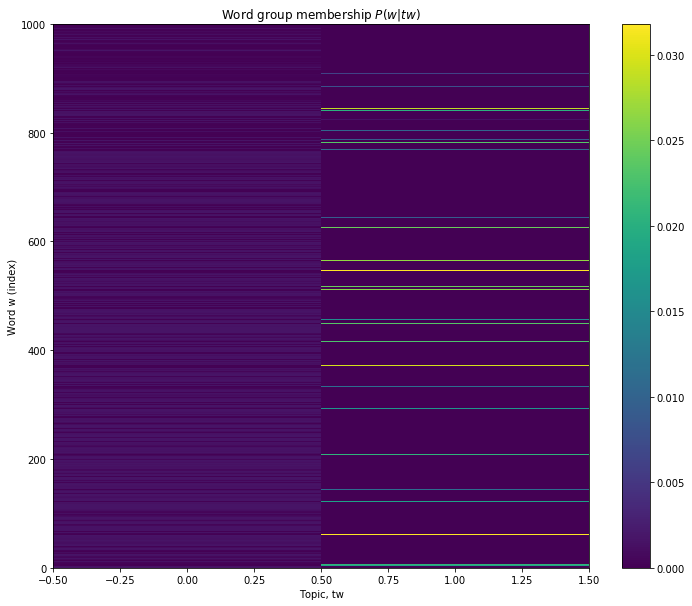

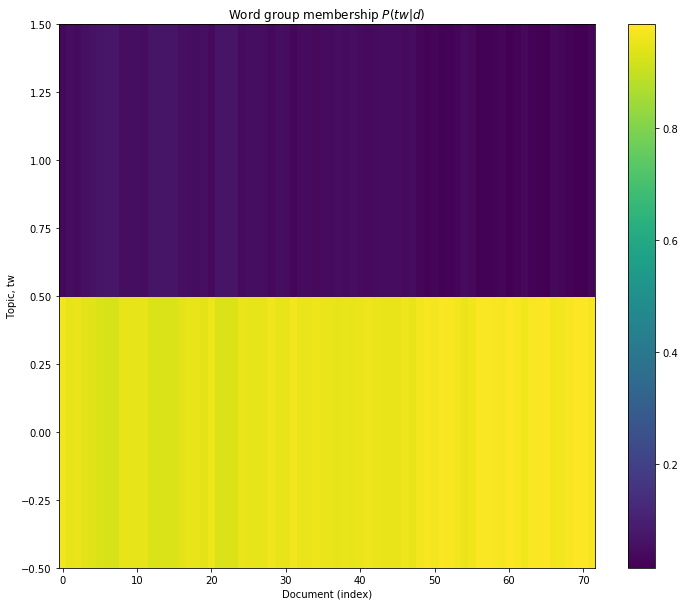

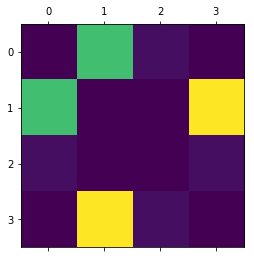

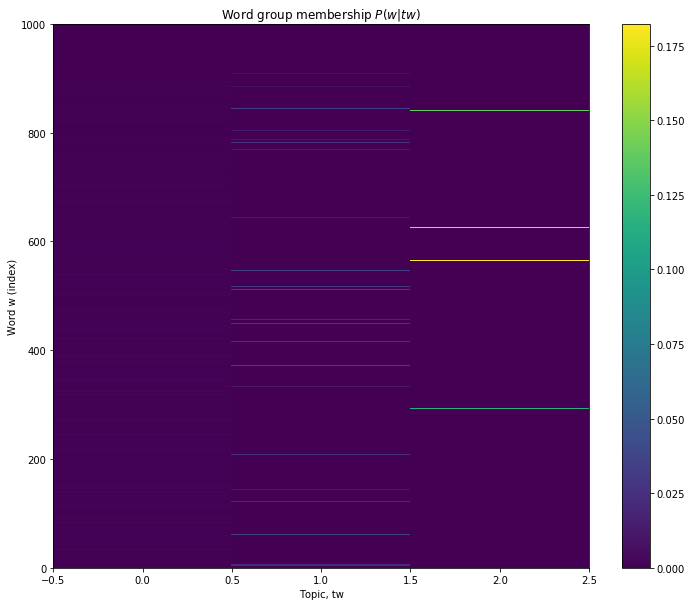

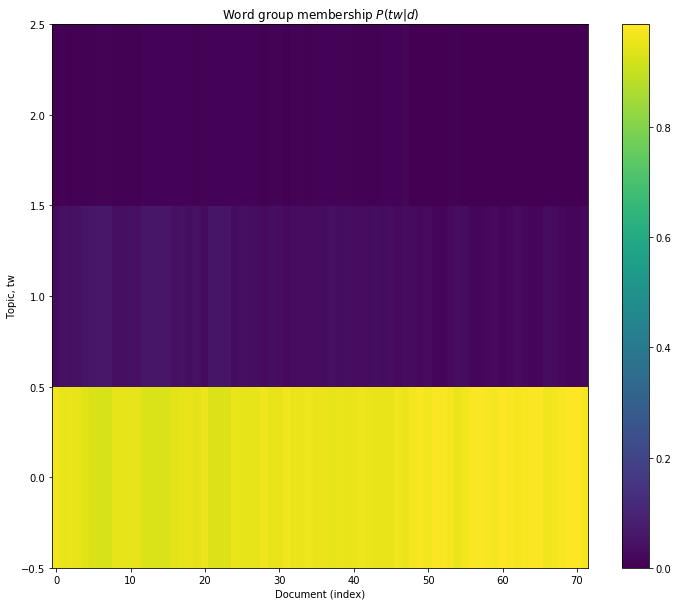

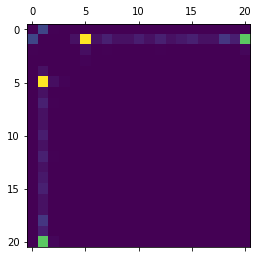

In [13]:
model_DV.save_data()

In [38]:
model_scialdone_DV_svg.plot(nedges = 1000, filename = 'hsbm_DV_svg/20_04/plot.png')

AttributeError: 'NoneType' object has no attribute 'draw'

In [10]:

model_scialdone_DV_svg.topics(l=2)
#clusters_l1 = model_scialdone_DV_svg.clusters(l = 3)
#clusters_l1

{0: [('V46', 0.015476707024695264),
  ('V21', 0.01542221303579839),
  ('V29', 0.015128107222396221),
  ('V35', 0.015037579748984476),
  ('V26', 0.01467032221469251),
  ('V25', 0.014572773438332054),
  ('V52', 0.014570899776028325),
  ('V70', 0.014451537625900245),
  ('V48', 0.014400297892583533),
  ('V22', 0.014368820365880886)]}

In [15]:
model_scialdone_DV_svg.topicdist(2,l=1)

[(0, 0.3030421216848674),
 (1, 0.3297581903276131),
 (2, 0.2139235569422777),
 (3, 0.15327613104524182)]

In [63]:
model_DV.get_D()

72

In [26]:
layers = 2
for i in range(layers):
    group_memberships_d, group_memberships_w = model_DV.group_membership(l=i)
    df_w = pd.DataFrame(group_memberships_w, columns = df.index)
    df_d = pd.DataFrame(group_memberships_d, columns = df.columns)
    df_w.to_csv("hsbm_DV_svg/20_04/p_tw_w_l%s.csv"%i)
    df_d.to_csv('hsbm_DV_svg/20_04/topsbm_developer/p_td_d_l%s.csv'%i)

In [48]:
layer = 2
for i in range(layer + 1):
    group_memberships_d, group_memberships_w = model_scialdone_DV_svg.group_membership(l=i)
    df_w_t = pd.DataFrame(group_memberships_w, columns = df_scialdone.index)
    df_d_t = pd.DataFrame(group_memberships_d, columns = df_scialdone.columns)
    df_w_t.to_csv("hsbm_DV_svg/20_04/p_tw_w_l%s.csv"%i)
    df_d_t.to_csv('hsbm_DV_svg/20_04/p_td_d_l%s.csv'%i)

KeyError: 2

In [50]:
model_scialdone_DV_svg.groups(l=0)

TypeError: 'dict' object is not callable

In [22]:
#result = model_DV.get_groups(l=1)
results = model_2D.get_groups(l=1)
results

NameError: name 'model_2D' is not defined

In [18]:
result_scialdone['p_tw_d'].T

array([[0.27368421, 0.18947368, 0.23157895, 0.30526316],
       [0.25740848, 0.27832655, 0.30214991, 0.16211505],
       [0.30304212, 0.32975819, 0.21392356, 0.15327613],
       ...,
       [0.33492823, 0.40191388, 0.11004785, 0.15311005],
       [0.28639053, 0.27948718, 0.2877712 , 0.14635108],
       [0.22907154, 0.21423135, 0.25228311, 0.304414  ]])

In [13]:
model_scialdone_DV.print_summary(to)

In [13]:
model.get_groups(l=2)

{'Bd': 1,
 'Bw': 1,
 'p_td_d': array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1.]]),
 'p_tw_d': array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1.]]),
 'p_tw_w': array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [32]:
model_scialdone_DV.clusteranalysis()

AttributeError: sbmtm instance has no attribute 'clusteranalysis'

In [24]:
#model_scialdone_DV.dump_model()
#with open("topsbm.pkl_try", 'wb') as f:
            #pickle.dump(model_DV, f)
#with open("topsbm_scialdone_try.pkl", 'wb') as f:
            #pickle.dump(model_scialdone_DV, f)
model_scialdone_DV_svg.dump_model(filename = 'hsbm_DV_svg/topsbm.pkl')

In [25]:
del test

In [46]:
#file = open()
#test = pickle.load(open("test.pkl",'rb'))
model_scialdone_DV_svg = pickle.load(open("hsbm_DV_svg/20_04/topsbm.pkl",'rb'))
model_scialdone_DV_svg

In [56]:
topics = model_DV.topics()
topics

{0: [('Kcnj2', 0.0016487291046485002),
  ('Mal', 0.0016487291046485002),
  ('Limk2', 0.0016487291046485002),
  ('S100a8', 0.0016487291046485002),
  ('S100a9', 0.0016487291046485002),
  ('Omd', 0.0016487291046485002),
  ('Igf1', 0.0016487291046485002),
  ('Abcg1', 0.0016487291046485002),
  ('Actr6', 0.0016487291046485002),
  ('Zdhhc21', 0.0016487291046485002)],
 1: [('2310057J18Rik', 0.03721781574130567),
  ('Olfr1093', 0.03721781574130567),
  ('Ngp', 0.035387431360585725),
  ('Pprc1', 0.03477730323367907),
  ('Klf16', 0.03477730323367907),
  ('Olfr1463', 0.03355704697986577),
  ('Olfr730', 0.03294691885295912),
  ('Nrros', 0.03172666259914582),
  ('Hcar2', 0.03050640634533252),
  ('Olfr1352', 0.03050640634533252)],
 2: [('Olfr1318', 0.18214285714285713),
  ('Olfr297', 0.16785714285714284),
  ('Olfr1438-ps1', 0.15357142857142858),
  ('Olfr947-ps1', 0.15),
  ('Olfr786', 0.1392857142857143),
  ('Moxd2', 0.11428571428571428),
  ('Olfr1051', 0.09285714285714286)]}